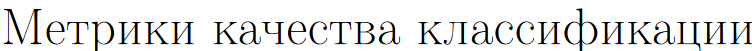

In [32]:
import pandas as pd
import numpy as np
import sklearn.metrics as sk_m

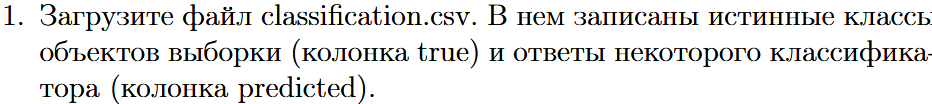

In [33]:
data = pd.read_csv('classification.csv')

In [34]:
true = data['true']
pred = data['pred']

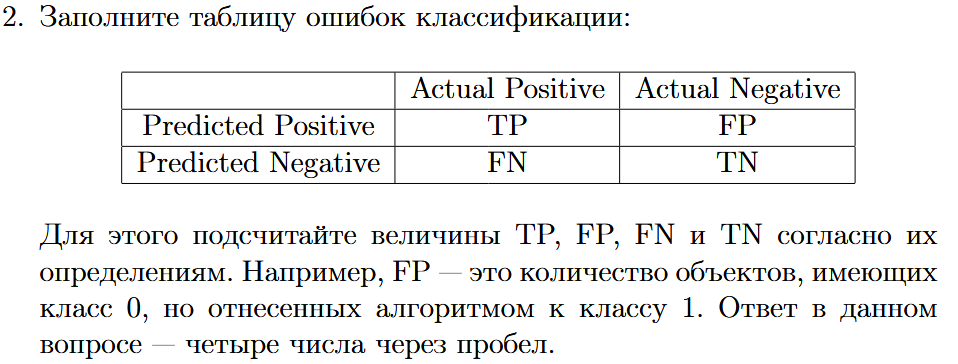 

In [35]:
TP = sum((data['true']==1) & (data['pred']==1))
FP = sum((data['true']==0) & (data['pred']==1))
FN = sum((data['true']==1) & (data['pred']==0))
TN = sum((data['true']==0) & (data['pred']==0))
TP, FP, FN, TN

(43, 34, 59, 64)

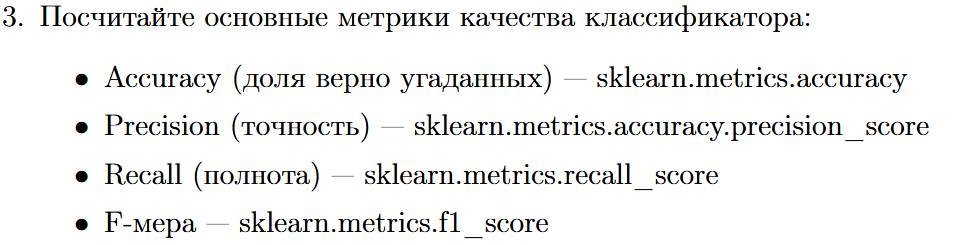

- Accuracy (доля верно угаданных)

In [36]:
sk_m.accuracy_score(true, pred)

0.535

- Precision (точность)

In [37]:
sk_m.precision_score(true, pred)

0.5584415584415584

- Recall (полнота)

In [38]:
sk_m.recall_score(true, pred)

0.4215686274509804

- F-мера

In [39]:
sk_m.f1_score(true, pred)

0.48044692737430167

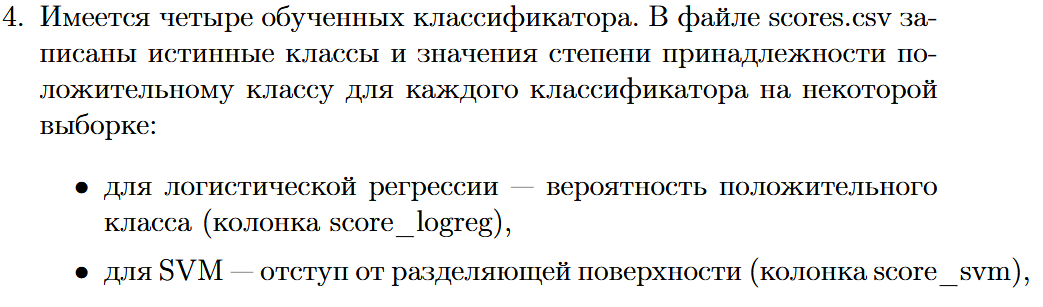
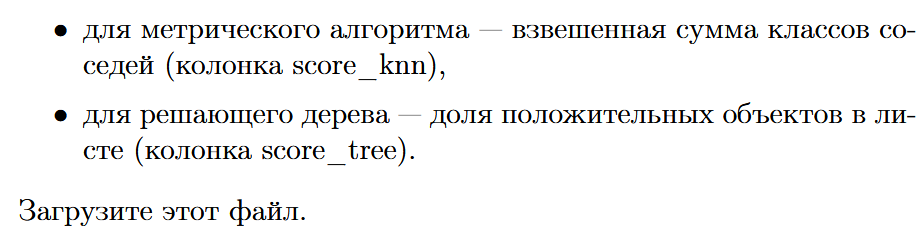

In [40]:
scores = pd.read_csv('scores.csv')
scores.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


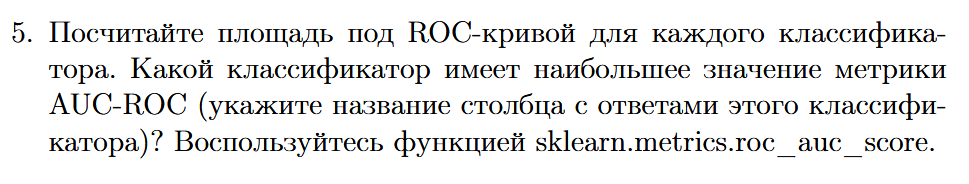

In [41]:
auc_roc_scores = {}

for column in scores.columns[1:]:
    auc_roc = sk_m.roc_auc_score(scores['true'], scores[column])
    auc_roc_scores[column] = auc_roc
    
auc_roc_scores

{'score_logreg': 0.719187675070028,
 'score_svm': 0.7086834733893557,
 'score_knn': 0.6351540616246498,
 'score_tree': 0.6919267707082833}

In [42]:
# Поиск лучшего классификатора
best_classifier = max(auc_roc_scores, key=auc_roc_scores.get)
best_score = auc_roc_scores[best_classifier]

print(f"Классификатор с наибольшим AUC-ROC:{best_classifier}. Значение AUC-ROC:{best_score:.2f}")

Классификатор с наибольшим AUC-ROC:score_logreg. Значение AUC-ROC:0.72


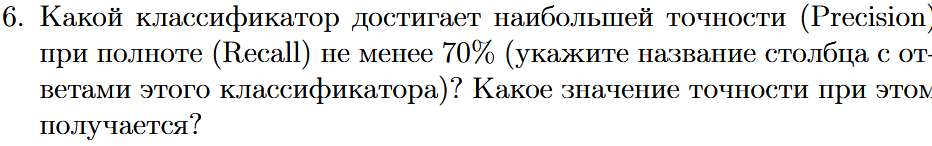

In [43]:
pr_scores = {}
for clf in scores.columns[1:]:
    precision, recall, _ = sk_m.precision_recall_curve(scores["true"], scores[clf])
    max_precision = max(precision[recall >= 0.7])
    pr_scores[clf] = max_precision

print(max(pr_scores), pr_scores[max(pr_scores)])

score_tree 0.6517857142857143
